In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np

import seaborn as sns
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
#read dataset as df
df = pd.read_csv('./MT_Data/naive_algorithm_sqp.csv')
df

,zeta,omega_ratio,solution_1,solution_2,solution_3,power,test_FLAG
0,0.01,1.00,0.999199,0.001208,-0.000404,-0.000000e+00,1
1,0.02,0.99,-0.997510,-0.002471,-0.000022,-0.000000e+00,1
2,0.02,1.00,1.001320,-0.001983,0.000666,-8.105375e-19,1
3,0.03,0.99,0.996368,0.004191,-0.000556,-0.000000e+00,1
4,0.03,1.00,1.000778,-0.001158,0.000382,-0.000000e+00,1
...,...,...,...,...,...,...,...
4844,1.00,1.40,1.073556,-0.079760,0.006205,-0.000000e+00,1
4845,1.00,1.41,1.071948,-0.076842,0.004895,-0.000000e+00,1
4846,1.00,1.42,1.067925,-0.070476,0.002552,-0.000000e+00,1
4847,1.00,1.43,1.072844,-0.077381,0.004539,-0.000000e+00,1


In [3]:
#get valid data from the dataset
zeta = np.array(df.zeta)
omega_ratio = np.array(df.omega_ratio)
power = np.array(df.power)
#zeta

In [4]:
df_zeta_c = pd.DataFrame({'new_z':zeta,'new_omega':omega_ratio })
edge_df_c = df_zeta_c.groupby('new_z').min('new_omega')
z_coord = np.array(edge_df_c.index)
omega_coord = np.array(edge_df_c.new_omega)

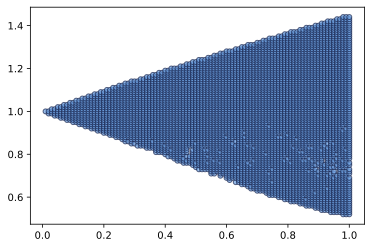

In [5]:
omega_im = plt.scatter(zeta, omega_ratio, c="#6ba0e2" , edgecolor = "#17234b", alpha=0.7, marker = '.',s = 100)
#edge_im = plt.scatter(z_coord,omega_coord, c="#cba74e" ,edgecolor = "#5b503f", alpha=0.7, marker = '.',s = 100)
#edge_lane= plt.plot(z_coord, omega_coord,c= "#5b503f",alpha=0.8, linewidth=1,linestyle = 'dashdot')
plt.savefig('naive_algorithm_sqp.svg',format='svg',dpi=600)
plt.show()

In [27]:
#reshape 1D vec -> 2D matrix

#dimension of sz
sz = int(np.sqrt(len(zeta)))

z = zeta.reshape(sz,sz)
OR = omega_ratio.reshape(sz,sz)
P = power.reshape(sz,sz)
#P

     new_z  new_omega
0     0.01       0.96
1     0.06       0.96
2     0.11       0.91
3     0.11       0.96
4     0.16       0.96
..     ...        ...
100   0.96       0.76
101   0.96       0.81
102   0.96       0.86
103   0.96       0.91
104   0.96       0.96

[105 rows x 2 columns]
       new_omega
new_z           
0.01        0.96
0.06        0.96
0.11        0.91
0.16        0.96
0.21        0.86
0.26        0.81
0.31        0.86
0.36        0.86
0.41        0.86
0.46        0.61
0.51        0.61
0.56        0.61
0.61        0.61
0.66        0.61
0.71        0.56
0.76        0.56
0.81        0.56
0.86        0.56
0.91        0.56
0.96        0.56


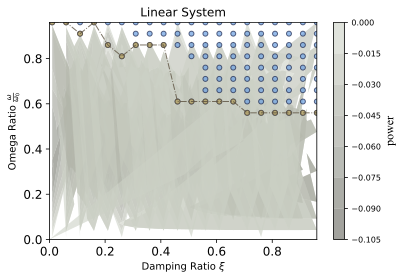

In [32]:
#change the textlabel
#combine the plot
Prj_z = []
Prj_omega = []

plt.xlabel( r"Damping Ratio $\xi$")
plt.ylabel(r"Omega Ratio $\frac{\omega}{\omega_{0}}$")
plt.title('Linear System')

colors_palatte = ['#6a6b62','#64655c','#707168','#7b7d73','#75776d','#87897f','#818379','#8d8f85','#989b90','#92958a','#9ea096','#a4a69c','#a9aca1','#afb2a7','#b5b8ad','#bbbeb3','#cac4b9','#c6cab3','#ccd0c4','#d2d6ca']
my_cmap=mpl.colors.ListedColormap(colors_palatte)
plt.cm.register_cmap(name='mycmp',cmap=my_cmap)

p_im = plt.contourf(z,OR,P,cmap =plt.cm.get_cmap('mycmp'),alpha=0.6)

for i in range(0,sz):
    for j in range(0,sz):
        if abs(P[i,j]) <= 0.025:
            if OR[i,j]>0.4:
                Prj_z = np.append(Prj_z,z[i,j])
                Prj_omega = np.append(Prj_omega,OR[i,j])

df_zOR = pd.DataFrame({'new_z':Prj_z,'new_omega':Prj_omega })
edge_df = df_zOR.groupby('new_z').min('new_omega')
edge_df.to_csv('edgedata.csv', index='False')
df_zOR.to_csv('basic_nodes.csv', index='False')

#edge_Df
z_coord = np.array(edge_df.index)
#z_cood
omega_coord = np.array(edge_df.new_omega)

print(df_zOR)
print(edge_df)
                
omega_im = plt.scatter(Prj_z, Prj_omega, c="#6ba0e2" , edgecolor = "#17234b", alpha=0.7, marker = '.',s = 100)
edge_im = plt.scatter(z_coord, omega_coord, c="#cba74e" ,edgecolor = "#5b503f", alpha=0.7, marker = '.',s = 100)
edge_lane=plt.plot(z_coord, omega_coord,c= "#5b503f",alpha=0.8, linewidth=1,linestyle = 'dashdot')

cbar1 = plt.colorbar(p_im)

cbar1.ax.tick_params(labelsize = 8)  #fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
font = {'family' : 'Times New Roman',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
cbar1.set_label('power',fontdict=font) 

plt.savefig('undirect_opt_mapping_200r_2.svg',format='svg',dpi=600)
plt.savefig('undirect_opt_mapping_200r_2.png',format='svg',dpi=600)
plt.show()
